Reproduce Fig. 5, comparing the C_ell reconstructed from power spectra and correlation functions and their signal to noise.

In [1]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid1765/


In [2]:
test=False #if true, run test case to make sure code runs.

In [3]:
nside=1024
if test:
    nside=64
    
use_window=True
unit_window=False

do_pseudo_cl=True
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=True
use_binned_theta=True

store_win=True

do_cov=False

In [4]:
#setup tomographic bins
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,zp=np.array([z0_shear]),ns0=ns0_shear)
galaxy_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,zp=np.array([z0_galaxy]),ns0=ns0_galaxy)

ns0:  30.0
[1] 100 5
source_tomo_bins, zmax 5.0 1 0.3
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 61 3072 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/hildafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:396: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(shear_zbins[i]['window'])


ns0:  10.0
[0.5] 100 5
source_tomo_bins, zmax 5.0 0.5 0.22499999999999998
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 61 3072 31.0 10
Window done. Size: 0.0
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [5]:
corrs=[corr_ll]#corr_ll,corr_gg,corr_ggl]

In [6]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=[(2,2),(2,-2)]

In [7]:
#setup parameters
lmax_cl=3*nside-1 #5000
if test:
    lmax_cl=500
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

window_lmax=min(lmax_cl,3*nside-1)

lmin_cl_Bins=lmin_cl+2
lmax_cl_Bins=lmax_cl-10
Nl_bins=50
# Nl_bins2=10
# if test:
#     Nl_bins2=10
# l_bins0=l_bins*1.
# l_bins2=np.unique(np.int64(np.logspace(np.log10(l_bins0.max()),np.log10(lmax_cl_Bins),Nl_bins2+1)))
# l_bins=np.unique(np.append(l_bins,l_bins2))

# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=50)#,binning_mode='decreasing')
# l_bins=l_bins[l_bins<=lmax_cl_Bins]
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
lb_xi=lb*1.
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [8]:
do_xi=True

theta_min=0.01/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max=100. #1200./60
n_theta_bins=101
if test:
    n_theta_bins=15
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*50)
th0=th*1.
theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)

#Hankel Transform setup
WT_kwargs={'l':l0,'l_cut_weights':np.ones_like(l0),'theta':th*d2r,'s1_s2':[(0,0),(2,2),(2,-2)],
                      'wig_d_taper_order_low':None,'wig_d_taper_order_high':None}
#            'wig_d_taper_order_low':16,'wig_d_taper_order_high':20}
# if globals().get('WT') is None:
WT=wigner_transform(**WT_kwargs )
# WT_b=wigner_transform(**WT_kwargs)
WT_b=WT
WT.gather_data()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide


Scattering WT data 1


In [9]:
Skylens_kwargs=parse_dict(locals())
Skylens_kwargs['do_pseudo_cl']=False
Skylens_kwargs['do_cov']=False
SL_xi0=Skylens(**Skylens_kwargs)
SL_xi0.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 100 46 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
get_Win, total cl, cov keys:  1 0
doing cov_iter: 0
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.00021696090698242188
set window_cl: cl done 4.342561960220337 1109.007 0.001
cl+cov b

In [10]:
Skylens_kwargs_ub=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_ub['use_binned_l']=False
Skylens_kwargs_ub['use_binned_theta']=False
Skylens_kwargs_ub['do_cov']=False
SL_xi0_ub=Skylens(**Skylens_kwargs_ub)
SL_xi0_ub.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
get_Win, total cl, cov keys:  1 0
doing cov_iter: 0
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.00016307830810546875
set window_cl: cl done 4.256145238876343 1109.007 0.001
cl+cov bags done 1 0 5.355053663253784
set_window_cl done 12.03663969039917
Got xi win graph
Window done. Size: 0.091
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary


In [11]:
cl_bu=client.gather(SL_xi0.cl_bin_utils)
xi_bu=client.gather(SL_xi0.xi_bin_utils)

In [12]:
%time xiHG0=SL_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()
%time xi0=client.compute(xiHG0['xi']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000846 1823.889
CPU times: user 18.1 s, sys: 6.14 s, total: 24.2 s
Wall time: 15.7 s
CPU times: user 676 ms, sys: 4.98 s, total: 5.66 s
Wall time: 8.39 s
CPU times: user 144 ms, sys: 955 ms, total: 1.1 s
Wall time: 1.53 s


In [13]:
%time xi_clG0_ub=SL_xi0_ub.cl_tomo()
%time xi_cl0_ub=client.compute(xi_clG0_ub['cl']).result()


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 17.9 s, sys: 2.26 s, total: 20.2 s
Wall time: 7.75 s
CPU times: user 66.8 ms, sys: 322 ms, total: 389 ms
Wall time: 684 ms


In [14]:
%time xi_clG0=SL_xi0.cl_tomo()
%time xi_cl0=client.compute(xi_clG0['cl']).result()
# %time xi_pcl0=client.compute(xi_clG0['stack']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 363 ms, sys: 2.25 s, total: 2.61 s
Wall time: 5.7 s
CPU times: user 68.2 ms, sys: 271 ms, total: 340 ms
Wall time: 593 ms


In [15]:
cl0=xi_cl0

In [16]:
Wi={}
for si in s:
    Wi[si]=SL_xi0.inv_WT_binned[corr][si][bi].result()

In [17]:
wigner_files[2]= wig_home+'/wig3j_l5000_w5000_2_reorder.zarr'

In [18]:
l0c=np.arange(lmax_cl)
window_l_test=np.arange(lmax_cl)
wl0c=window_l_test
wu=window_utils(l=l0c,window_l=window_l_test,use_window=True,s1_s2s={corr:s[0],'shear_B':s[1]},
                corrs=corrs,wigner_step=100,wigner_files=wigner_files,bin_window=False)
wu.set_wig3j(set_wig_3j_2=True)

Win gen: step size 100 3071 3071.0 10
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l5000_w5000_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//wig3j_l5000_w5000_2_reorder.zarr'}
wigner done dict_keys([])


In [19]:
thc=1
l_smooth_min=500
l_smooth_max=1000
if test:
    l_smooth_min=50
    l_smooth_max=100

In [20]:
x=th0*60>thc
xi_t=np.ones_like(th0)
xi_t[~x]=0
wl_inv={}
xi_t2={}
xi_tb2={}
si=(0,0)
l_inv,wl_inv=WT.inv_projected_correlation(theta_xi=th0*d2r,wig_theta=th0*d2r,xi=xi_t,
                                              s1_s2=si,wig_d=WT.wig_d[si].T,wig_norm=WT.inv_wig_norm)

x=l_inv<l_smooth_min
x2=l_inv<l_smooth_max
x=x*x2
wl_inv[~x]*=np.cos((l_inv[~x]-l_inv[x].max())/(l_smooth_max-l_inv[x].max())*np.pi/2.)
wl_inv[~x2]*=0

tht,xi_t2=WT.projected_correlation(l_cl=l_inv,cl=wl_inv,s1_s2=si,wig_d=WT.wig_d[si],wig_norm=WT.wig_norm)
xi_tb2=SL_xi0.binning.bin_1d(xi=xi_t2,bin_utils=xi_bu[(2,-2)])


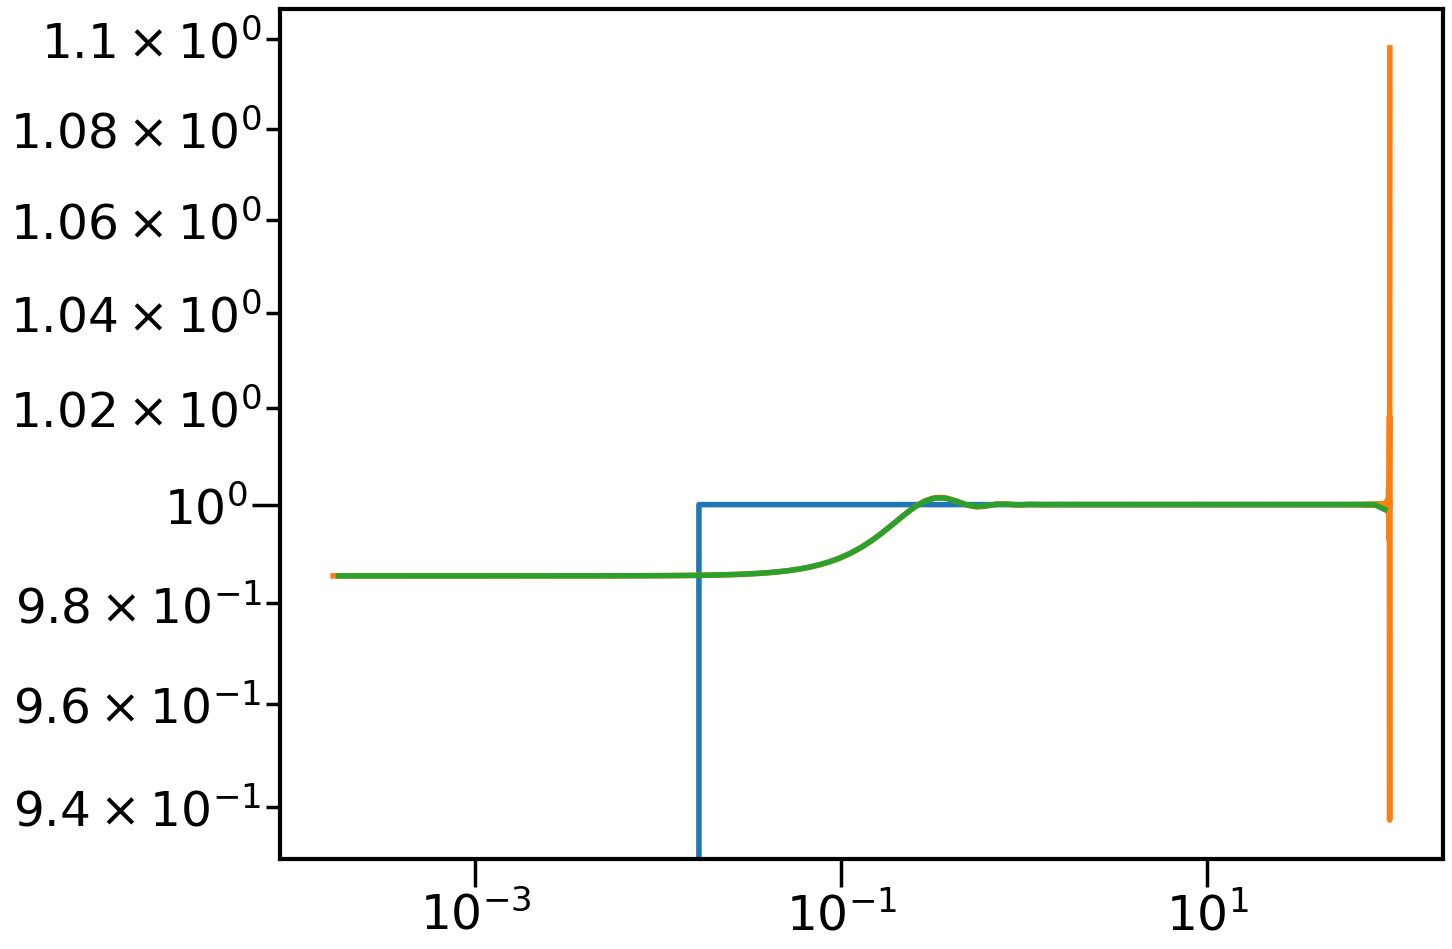

In [21]:
plot(th0,xi_t)
plot(th0,xi_t2)
plot(thb,xi_tb2)#[s[0]])
# plot(thb,xi_tb2)#[s[1]])
xscale('log')
yscale('log')

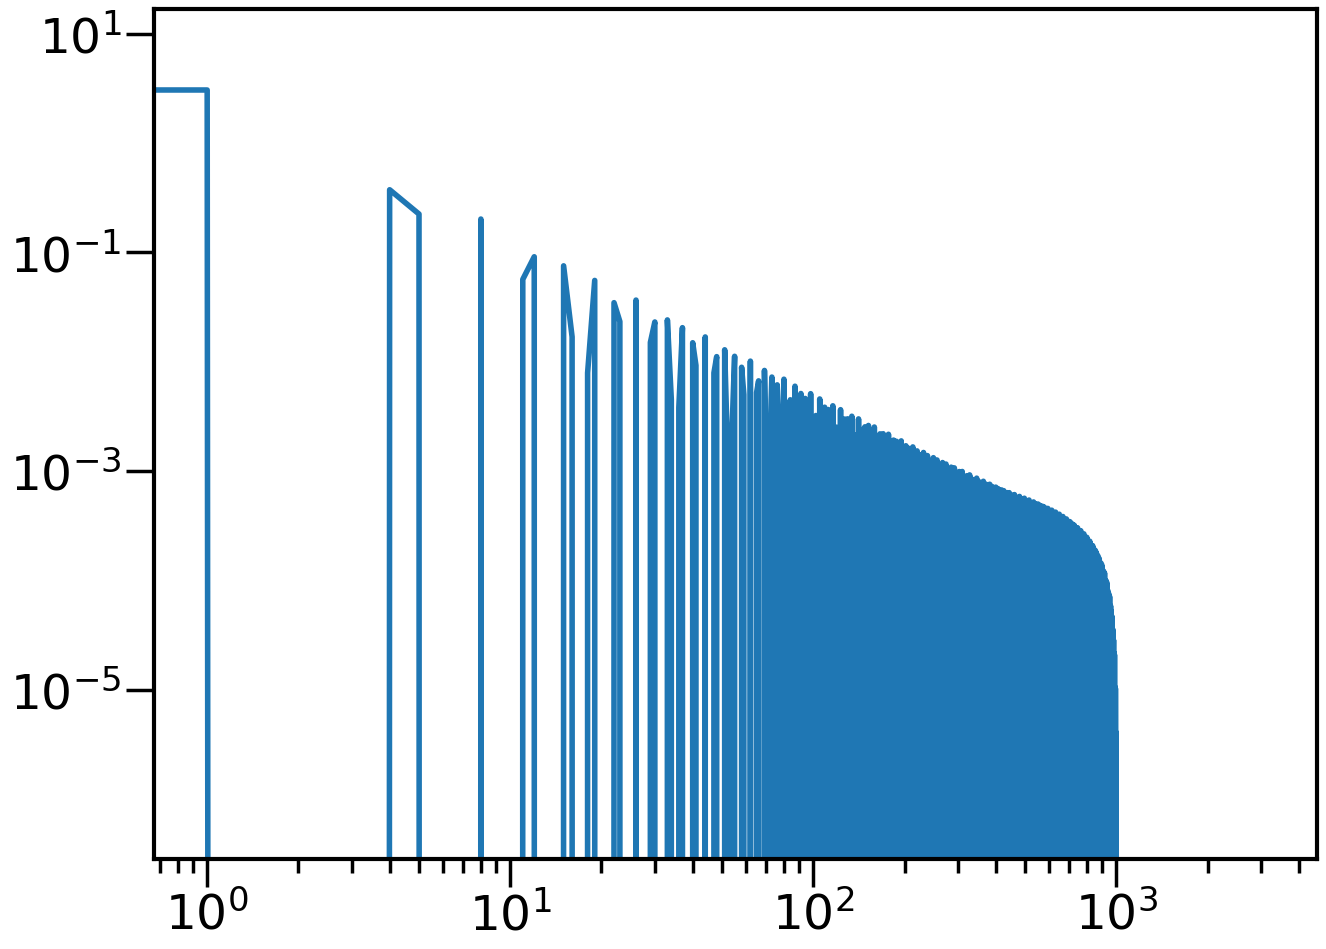

In [22]:
plot(l_inv,l_inv**0*wl_inv)
# plot(l_inv,l_inv**0*wl_inv[s[1]])
loglog()
xscale('log')

In [23]:
def coupling_matrix_large(wig_3j_2,wl,l,wk='22',W_pm=[2,-2]):
    M={}
    for wp in W_pm:
        M[wp]=wig_3j_2[wk][wp]@(wl*(2*l+1))
    return M

In [24]:
nl=len(l0c)
nlw=len(wl0c)
M_xi={si:np.zeros((nl,nl))for si in s}

M_lm={}
l0ci=wl0c

for lm in wu.lms:
    M_lm[lm]=coupling_matrix_large(client.compute(wu.wig_3j_2[lm]).result(),wl_inv,l0ci)
    start_i=lm
    end_i=lm+wu.step
    for si in s:
        wk=2
        if si==(2,-2):
            wk=-2
        M_xi[si][start_i:end_i,:]+=M_lm[lm][wk]
    print(lm,'done')
    del M_lm[lm]
    del wu.wig_3j_2[lm]
for si in s:
    M_xi[si]/=4.*np.pi
    M_xi[si]*=(2*l0c+1)

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done


In [25]:
Mb={}
Mi_xi={}
for si in s:
    Mb[si]=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi[si],bin_utils=cl_bu,wt0=xi_cl0_ub[corr][bi],wt_b=1./xi_cl0[corr][bi])
    Mi_xi[si]=np.linalg.pinv(Mb[si])

In [26]:
xi_cl0[corr_ll][bi].shape

(46,)

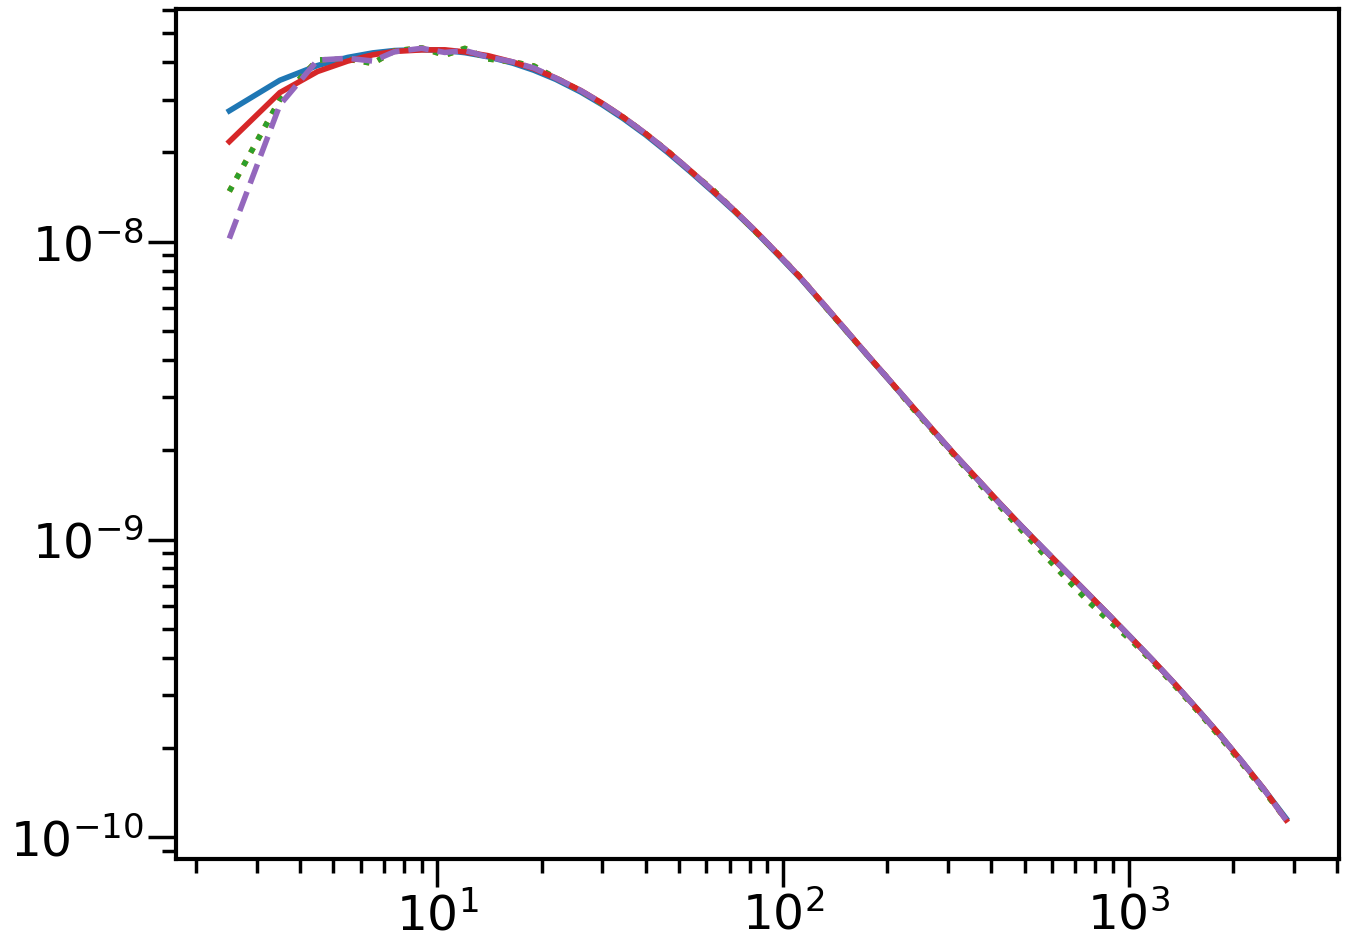

(0.9, 1.1)

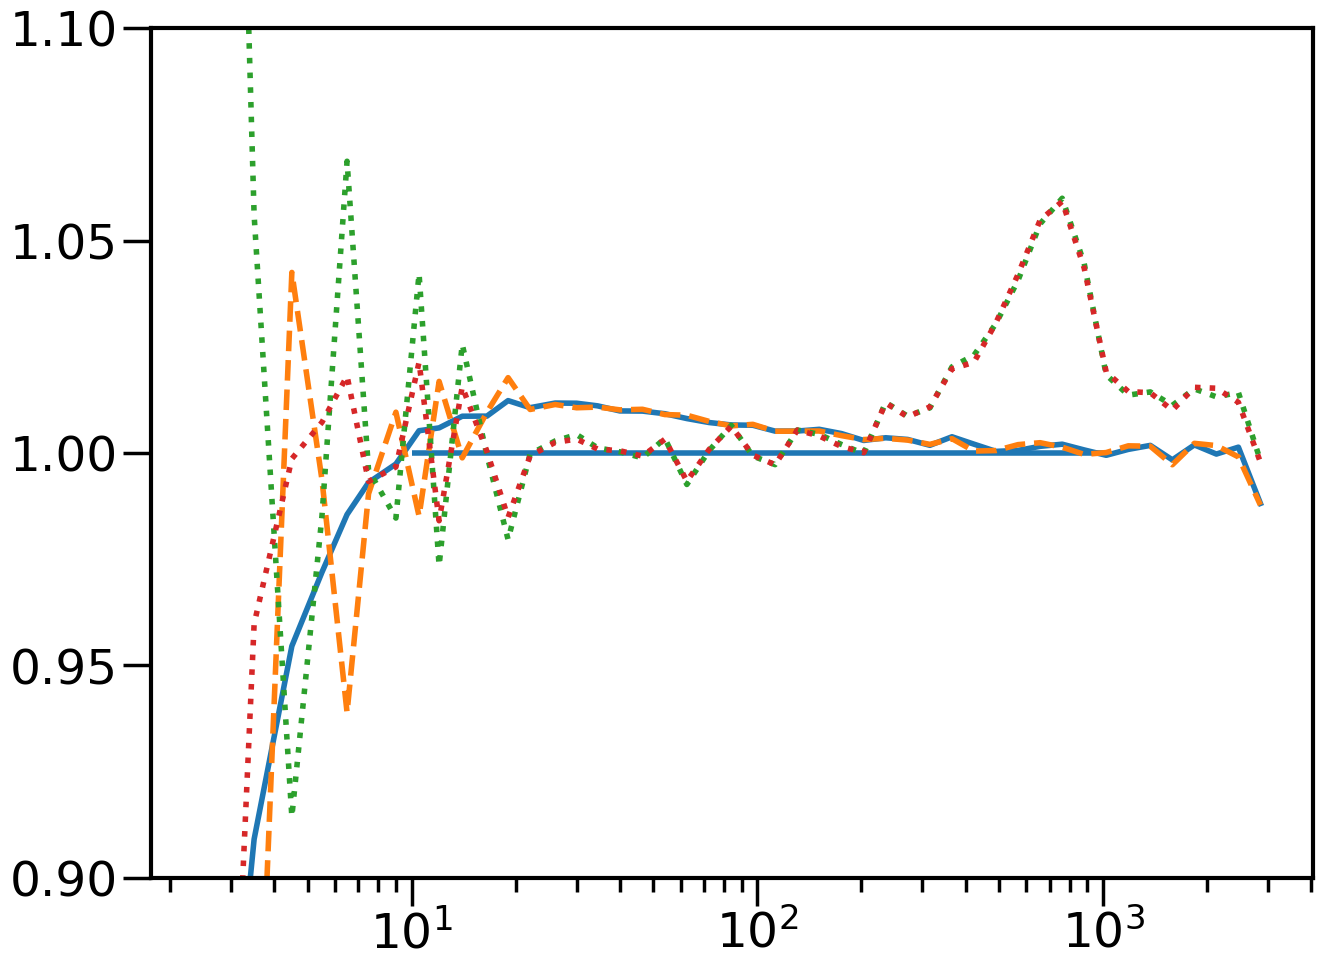

In [27]:
cl_xi={}
pcl={}
for si in s:
#     M_W=Mi_xi[si]@Wi[si]
    M_W=Wi[si]
    cl_xi[si]=M_W@xi0[corr_ll][si][bi]
    pcl[si]=xi_cl0_ub[corr_ll][bi]@M_xi[(2,2)]
    pcl[si]=SL_xi0_ub.binning.bin_1d(xi=pcl[si],bin_utils=cl_bu)

plot(lb,cl0[corr_ll][bi])
plot(lb,pcl[s[0]],':')
plot(lb,pcl[s[1]],':')
plot(lb,cl_xi[s[0]])
plot(lb,cl_xi[s[1]],'--')
loglog()
show()
plot(lb,cl_xi[s[0]]/cl0[corr_ll][bi])
plot(lb,cl_xi[s[1]]/cl0[corr_ll][bi],'--')

plot(lb,cl_xi[s[0]]/pcl[s[0]],':')
plot(lb,cl_xi[s[1]]/pcl[s[1]],':')

xscale('log')
hlines(1,10,1000)
ylim(0.9,1.1)

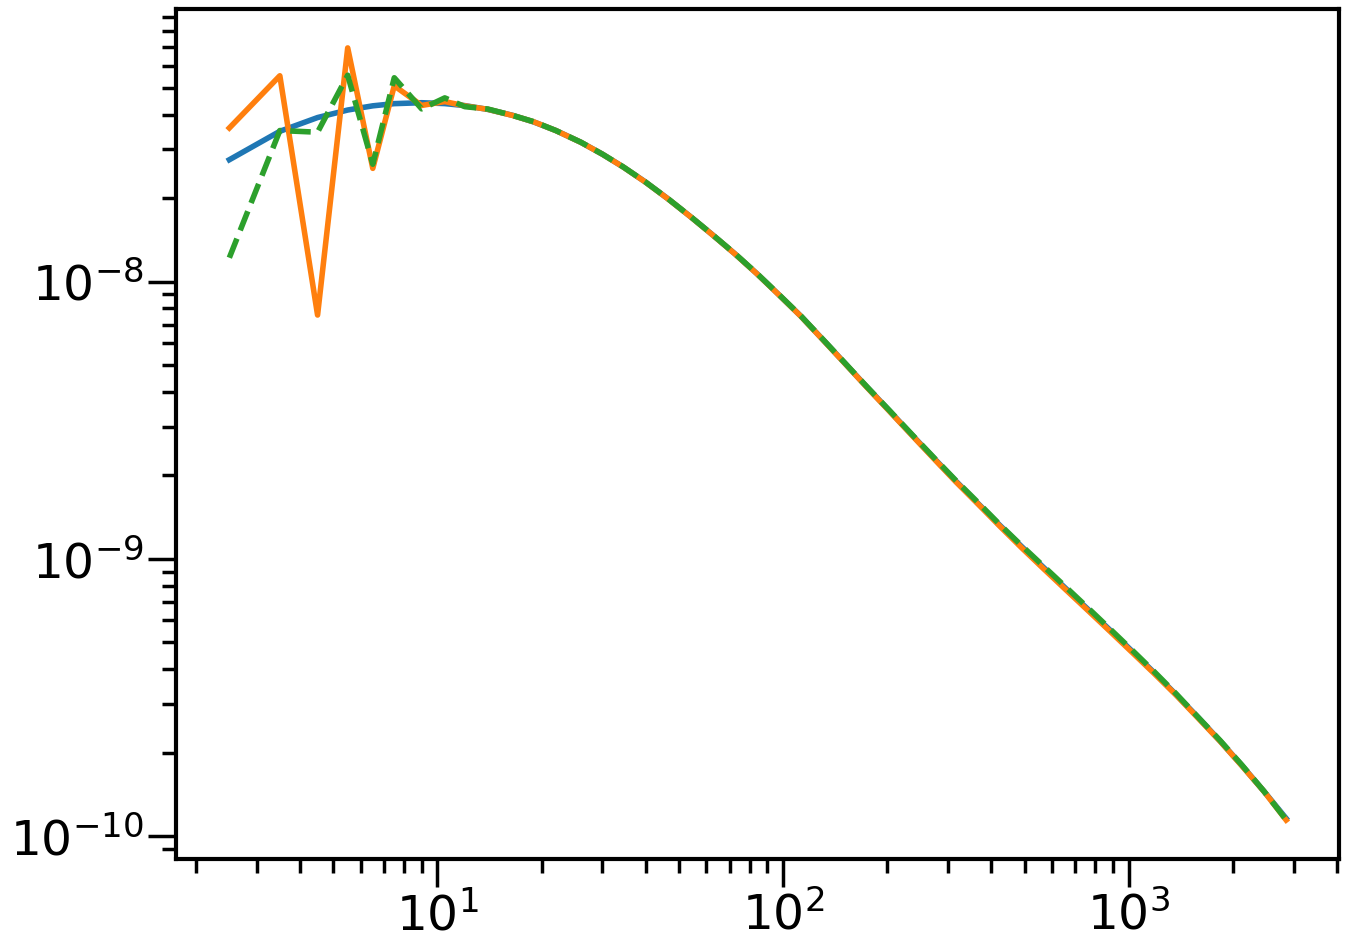

(0.9, 1.1)

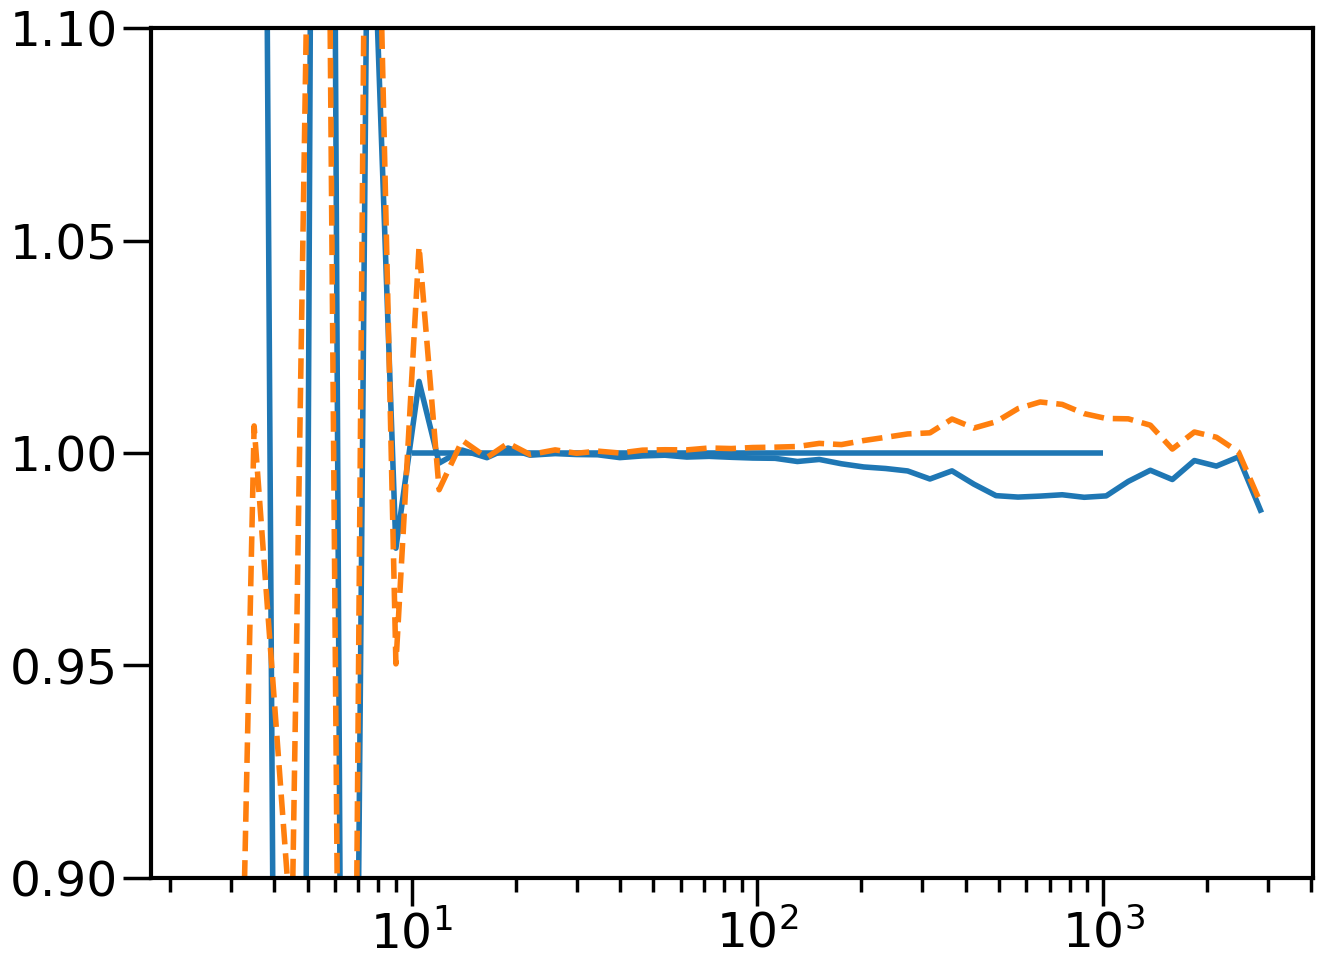

In [28]:
cl_xi={}
for si in s:
    M_W=Mi_xi[(2,2)]@Wi[si]
    cl_xi[si]=M_W@(xi0[corr_ll][si][bi]*xi_tb2)
# cl_xi_cov=M_W@xiH0_ub['cov']@M_W.T

plot(lb,cl0[corr_ll][bi])
plot(lb,cl_xi[s[0]])
plot(lb,cl_xi[s[1]],'--')
loglog()
show()
plot(lb,cl_xi[s[0]]/cl0[corr_ll][bi])
plot(lb,cl_xi[s[1]]/cl0[corr_ll][bi],'--')
xscale('log')
hlines(1,10,1000)
ylim(0.9,1.1)

In [163]:
cl_ee=xi_cl0_ub[corr_ll][bi]*1.
cl_bb=cl_ee*.1#/l0**.5 #changing slope creates problem with the binning wigner matrices, Wi
cl_bb[0]=0

cl_bb_b=SL_xi0.binning.bin_1d(xi=cl_bb,bin_utils=cl_bu)

In [164]:
tht,xi_p=WT.projected_correlation(l_cl=l0,cl=cl_ee+cl_bb,s1_s2=(2,2))
xi_pb=SL_xi0.binning.bin_1d(xi=xi_p,bin_utils=xi_bu[(2,2)])
tht,xi_m=WT.projected_correlation(l_cl=l0,cl=cl_ee-cl_bb,s1_s2=(2,-2))
xi_mb=SL_xi0.binning.bin_1d(xi=xi_m,bin_utils=xi_bu[(2,-2)])

[]

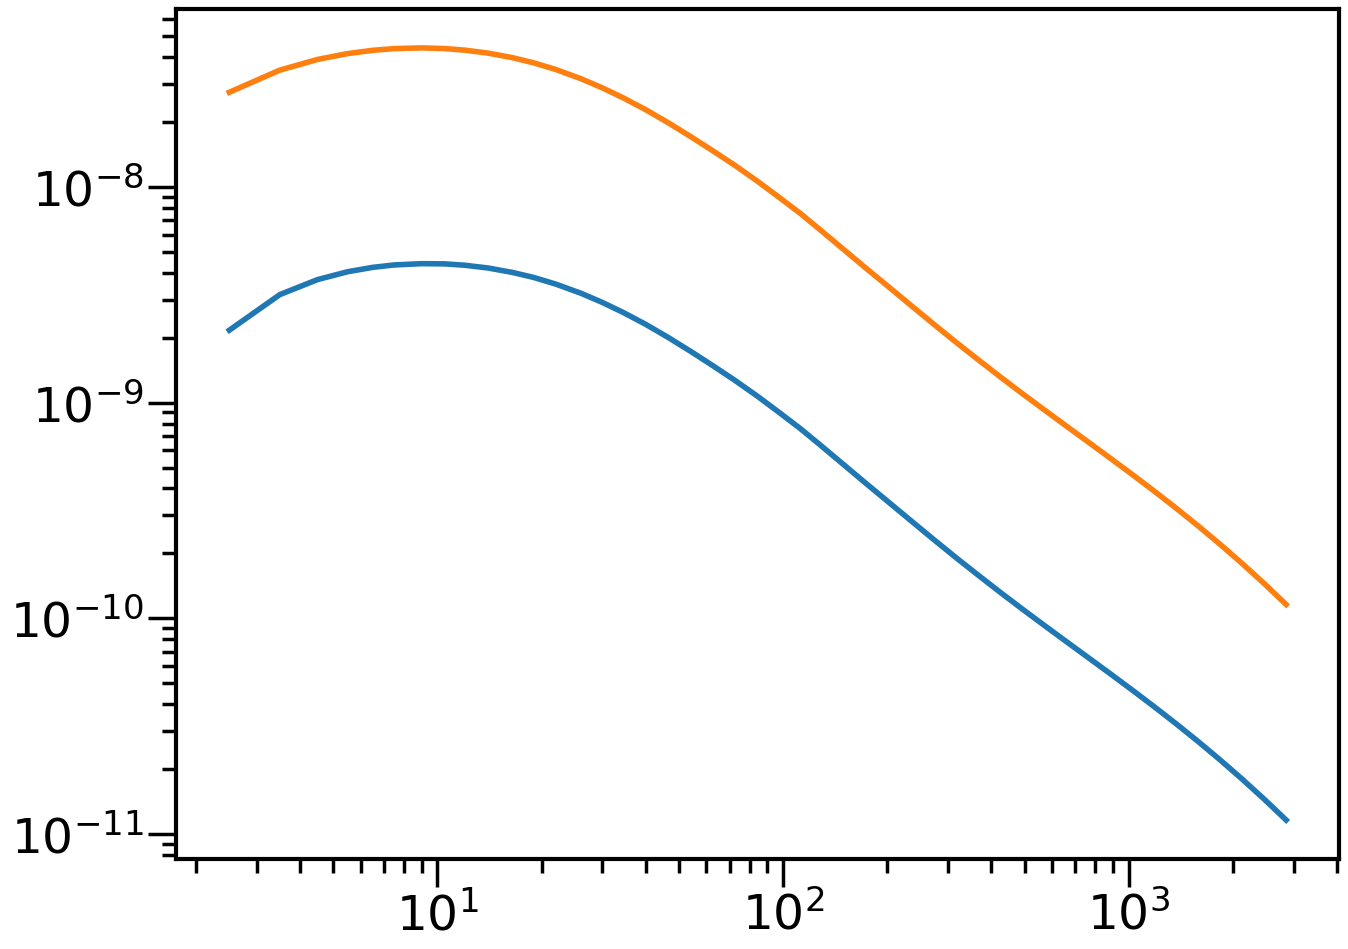

In [165]:
plot(lb,cl_bb_b)
plot(lb,cl0[corr][bi])
loglog()

In [166]:
Mb_EB={}
Mi_EB={}

Mb_EB['ee']=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi[(2,2)],bin_utils=cl_bu,wt0=xi_cl0_ub[corr][bi],wt_b=1./xi_cl0[corr][bi])
Mb_EB['ee2']=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi[(2,-2)],bin_utils=cl_bu,wt0=xi_cl0_ub[corr][bi],wt_b=1./xi_cl0[corr][bi])
Mi_EB['ee']=np.linalg.pinv(Mb_EB['ee'])

Mb_EB['BB']=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi[(2,2)],bin_utils=cl_bu,wt0=cl_bb,wt_b=1./cl_bb_b)
Mb_EB['BB2']=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi[(2,-2)],bin_utils=cl_bu,wt0=cl_bb,wt_b=1./cl_bb_b)
Mi_EB['BB']=np.linalg.pinv(Mb_EB['BB'])

In [167]:
cl_xi={}
pcl={}
for si in s:
#     M_W=Mi_xi[si]@Wi[si]
    M_W=Wi[si]
    pcl['p']=Wi[(2,2)]@(xi_pb*xi_tb2)
    pcl['m']=Wi[(2,-2)]@(xi_mb*xi_tb2)
    pcl['e']=(pcl['p']+pcl['m'])*0.5
    pcl['b']=(pcl['p']-pcl['m'])*0.5
    cl_xi['E']=Mi_EB['ee']@(pcl['e'])
    cl_xi['E2']=Mi_EB['ee']@(pcl['e']-Mb_EB['BB2']@(cl_bb_b))
    cl_xi['B']=Mi_EB['BB']@(pcl['b'])
    cl_xi['B2']=Mi_EB['BB']@(pcl['b']-Mb_EB['ee2']@(cl0[corr][bi]))

In [168]:
cl_xi['E_i']={0:Mi_EB['ee']@(pcl['e'])}
cl_xi['B_i']={0:Mi_EB['BB']@(pcl['b'])}

niter=10
for i in np.arange(niter)+1:
    cl_xi['E_i'][i]=Mi_EB['ee']@(pcl['e']-Mb_EB['BB2']@(cl_xi['B_i'][i-1]))
    cl_xi['B_i'][i]=Mi_EB['BB']@(pcl['b']-Mb_EB['ee2']@(cl_xi['E_i'][i-1]))

(20, 2000)

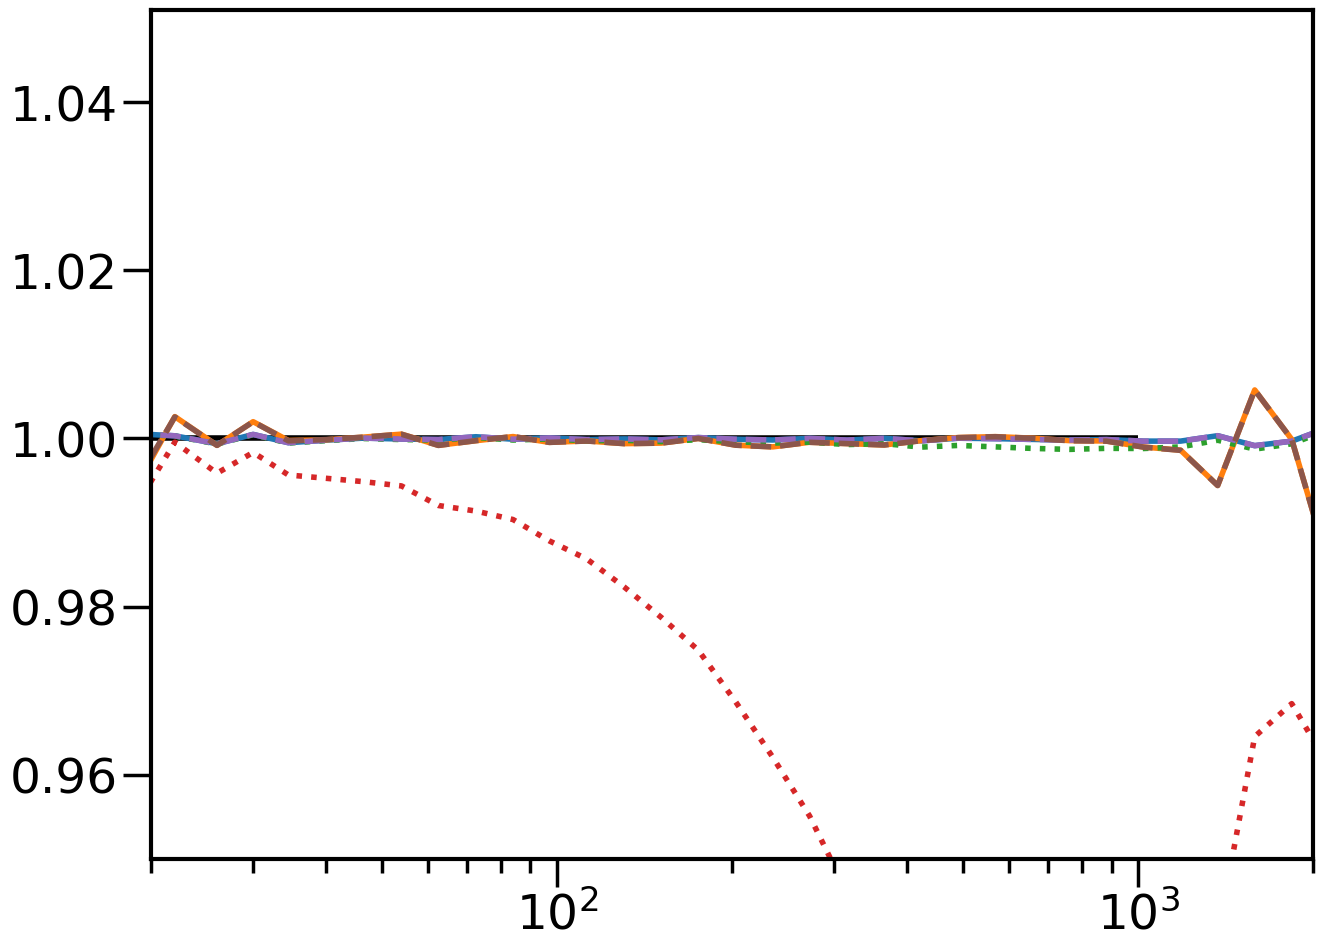

In [169]:
plot(lb,cl_xi['E2']/cl0[corr][bi])
plot(lb,cl_xi['B2']/cl_bb_b)

plot(lb,cl_xi['E_i'][0]/cl0[corr][bi],':')
plot(lb,cl_xi['B_i'][0]/cl_bb_b,':')

plot(lb,cl_xi['E_i'][2]/cl0[corr][bi],'--')
plot(lb,cl_xi['B_i'][2]/cl_bb_b,'--')

xscale('log')
hlines(1,10,1000,color='k')
ylim(0.95,1.051)
xlim(20,2000)

(20, 2000)

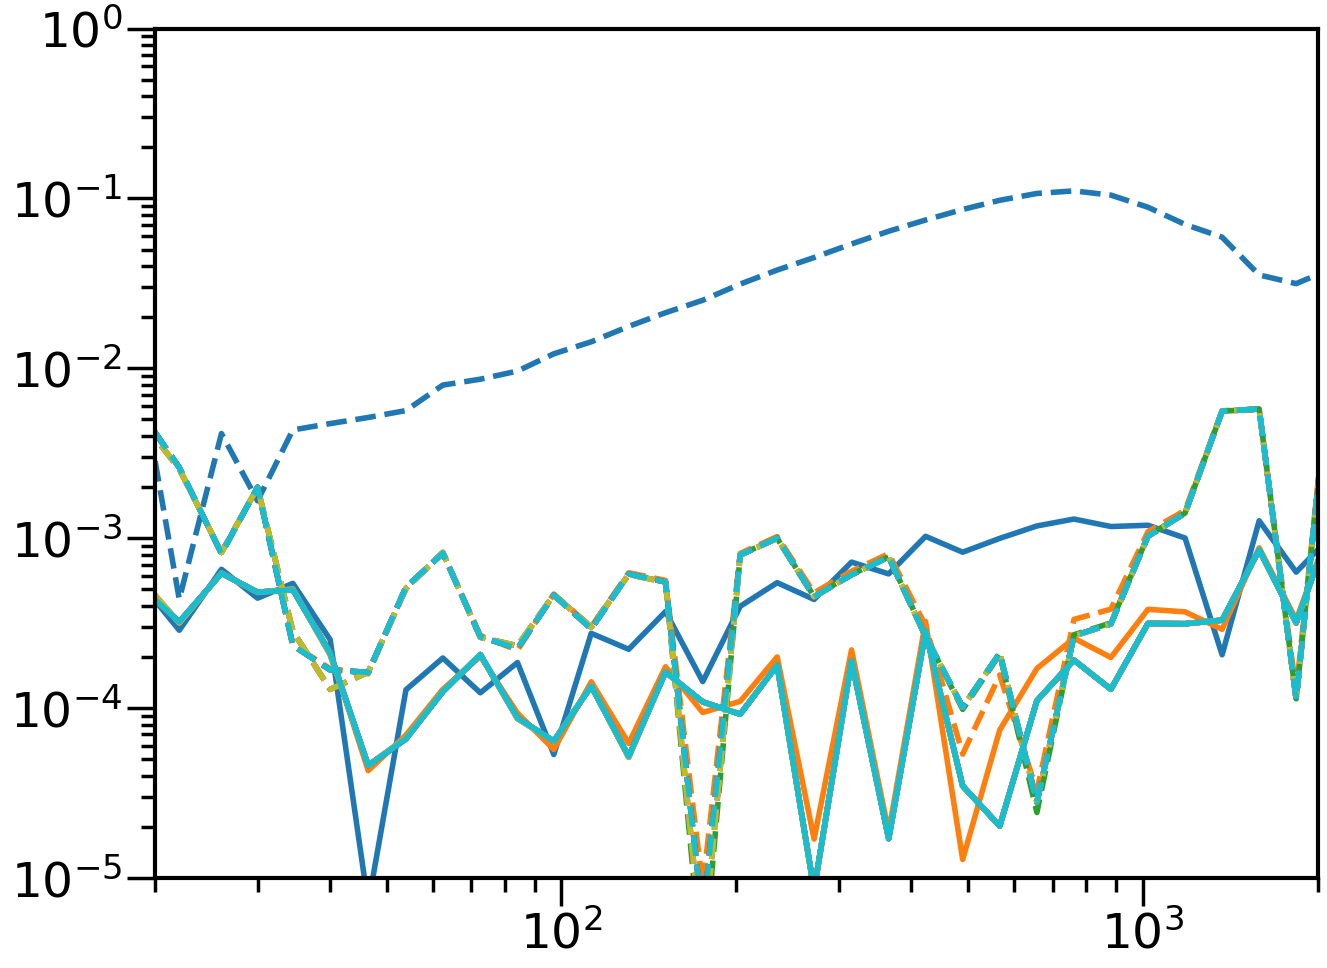

In [182]:
for i in np.arange(niter):
    plot(lb,np.absolute(1-cl_xi['E_i'][i]/cl0[corr][bi]),c=colors[i])
    plot(lb,np.absolute(1-cl_xi['B_i'][i]/cl_bb_b),'--',c=colors[i])

xscale('log')
yscale('log')
# hlines(1,10,1000,color='k')
ylim(1.e-5,1.e-0)
xlim(20,2000)

[]

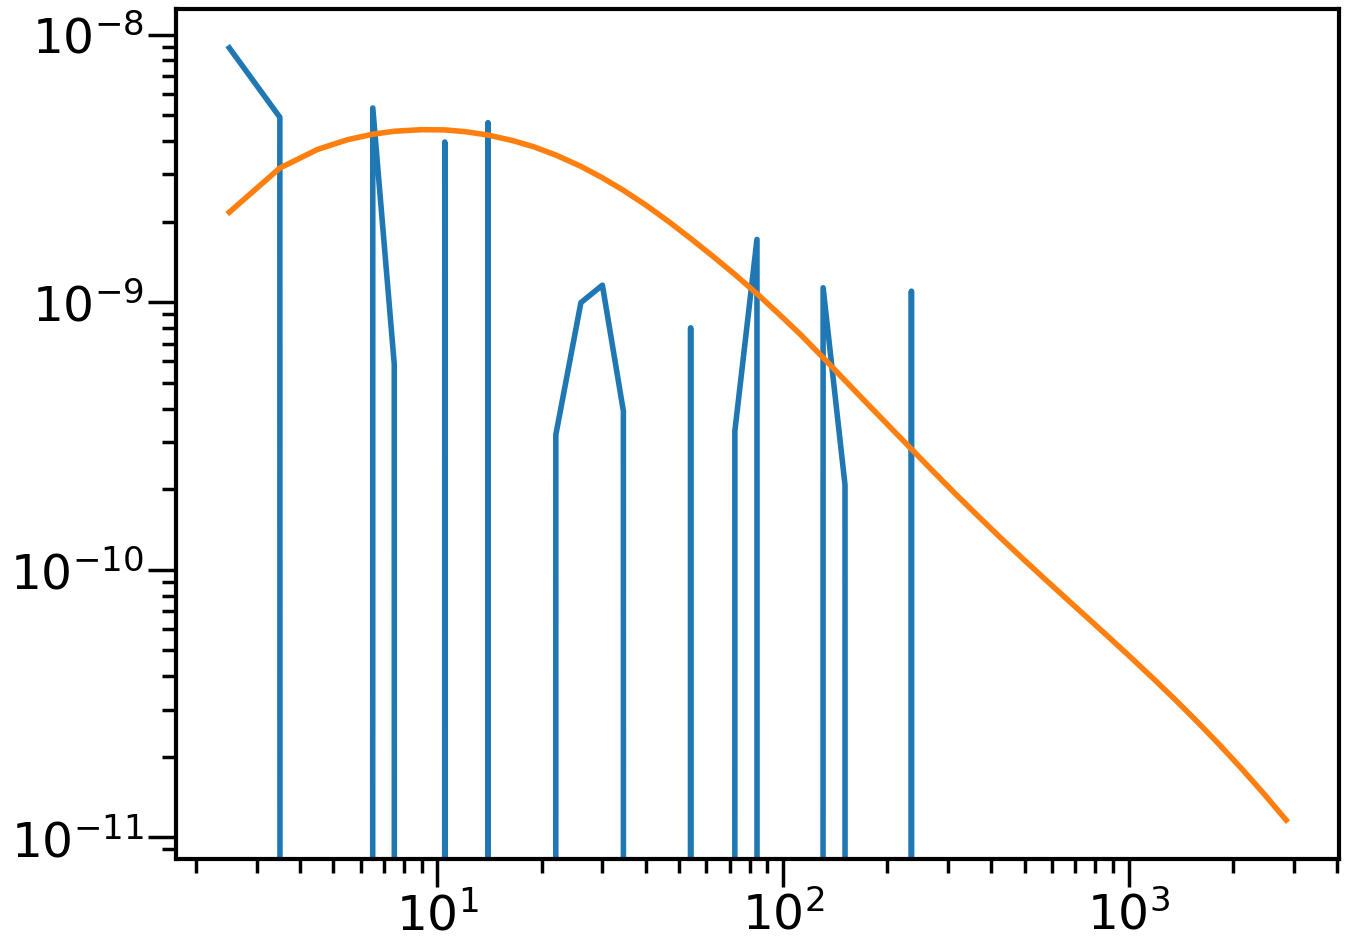

In [171]:
plot(lb,cl_xi['E']@Mb_EB['BB2'])
plot(lb,cl_bb_b)
loglog()

[]

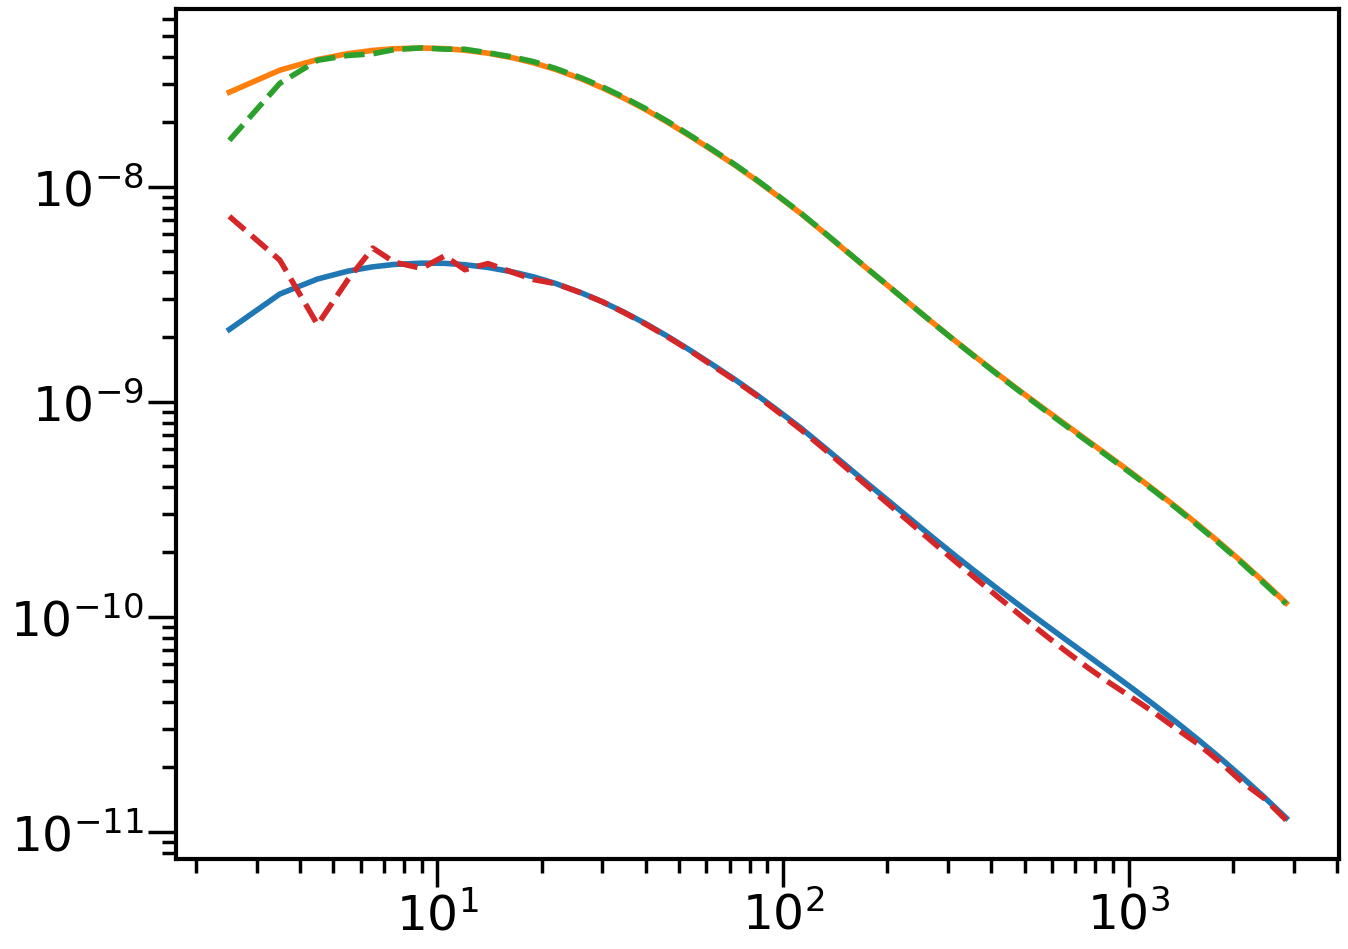

In [172]:

plot(lb,cl_bb_b)
plot(lb,cl0[corr][bi])
plot(lb,pcl['e'],'--')
plot(lb,pcl['b'],'--')
loglog()

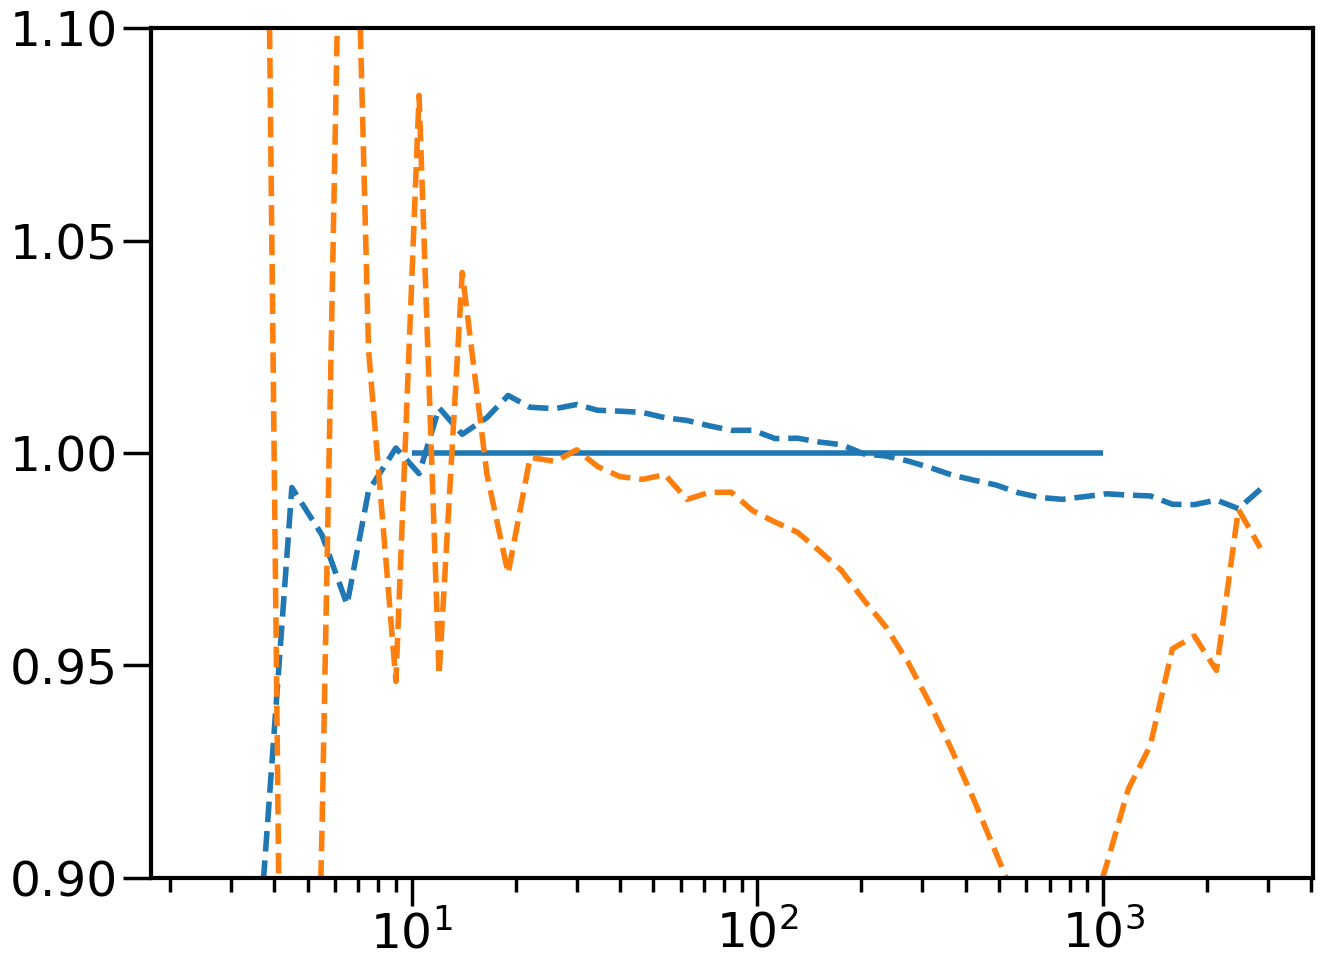

In [173]:
plot(lb,(pcl['e'])/cl0[corr][bi],'--')
plot(lb,(pcl['b'])/cl_bb_b,'--')
xscale('log')
ylim(0.9,1.1)
hlines(1,10,1000)

[]

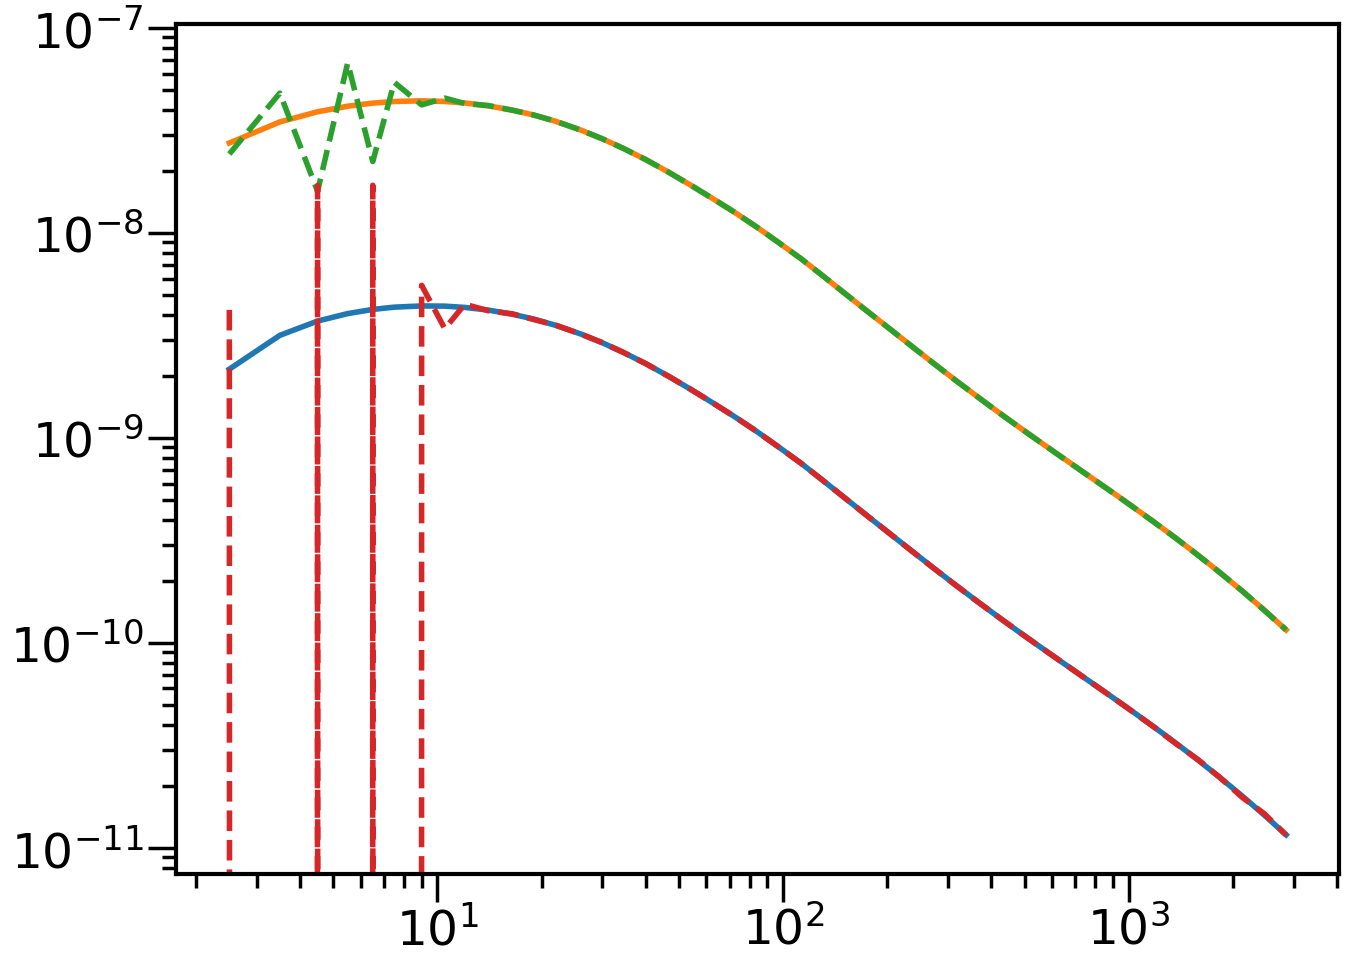

In [174]:
plot(lb,cl_bb_b)
plot(lb,cl0[corr][bi])
plot(lb,cl_xi['E'],'--')
plot(lb,cl_xi['B2'],'--')
loglog()

In [175]:
fig_home

'./figures/'

./figures/corr_EB.pdf


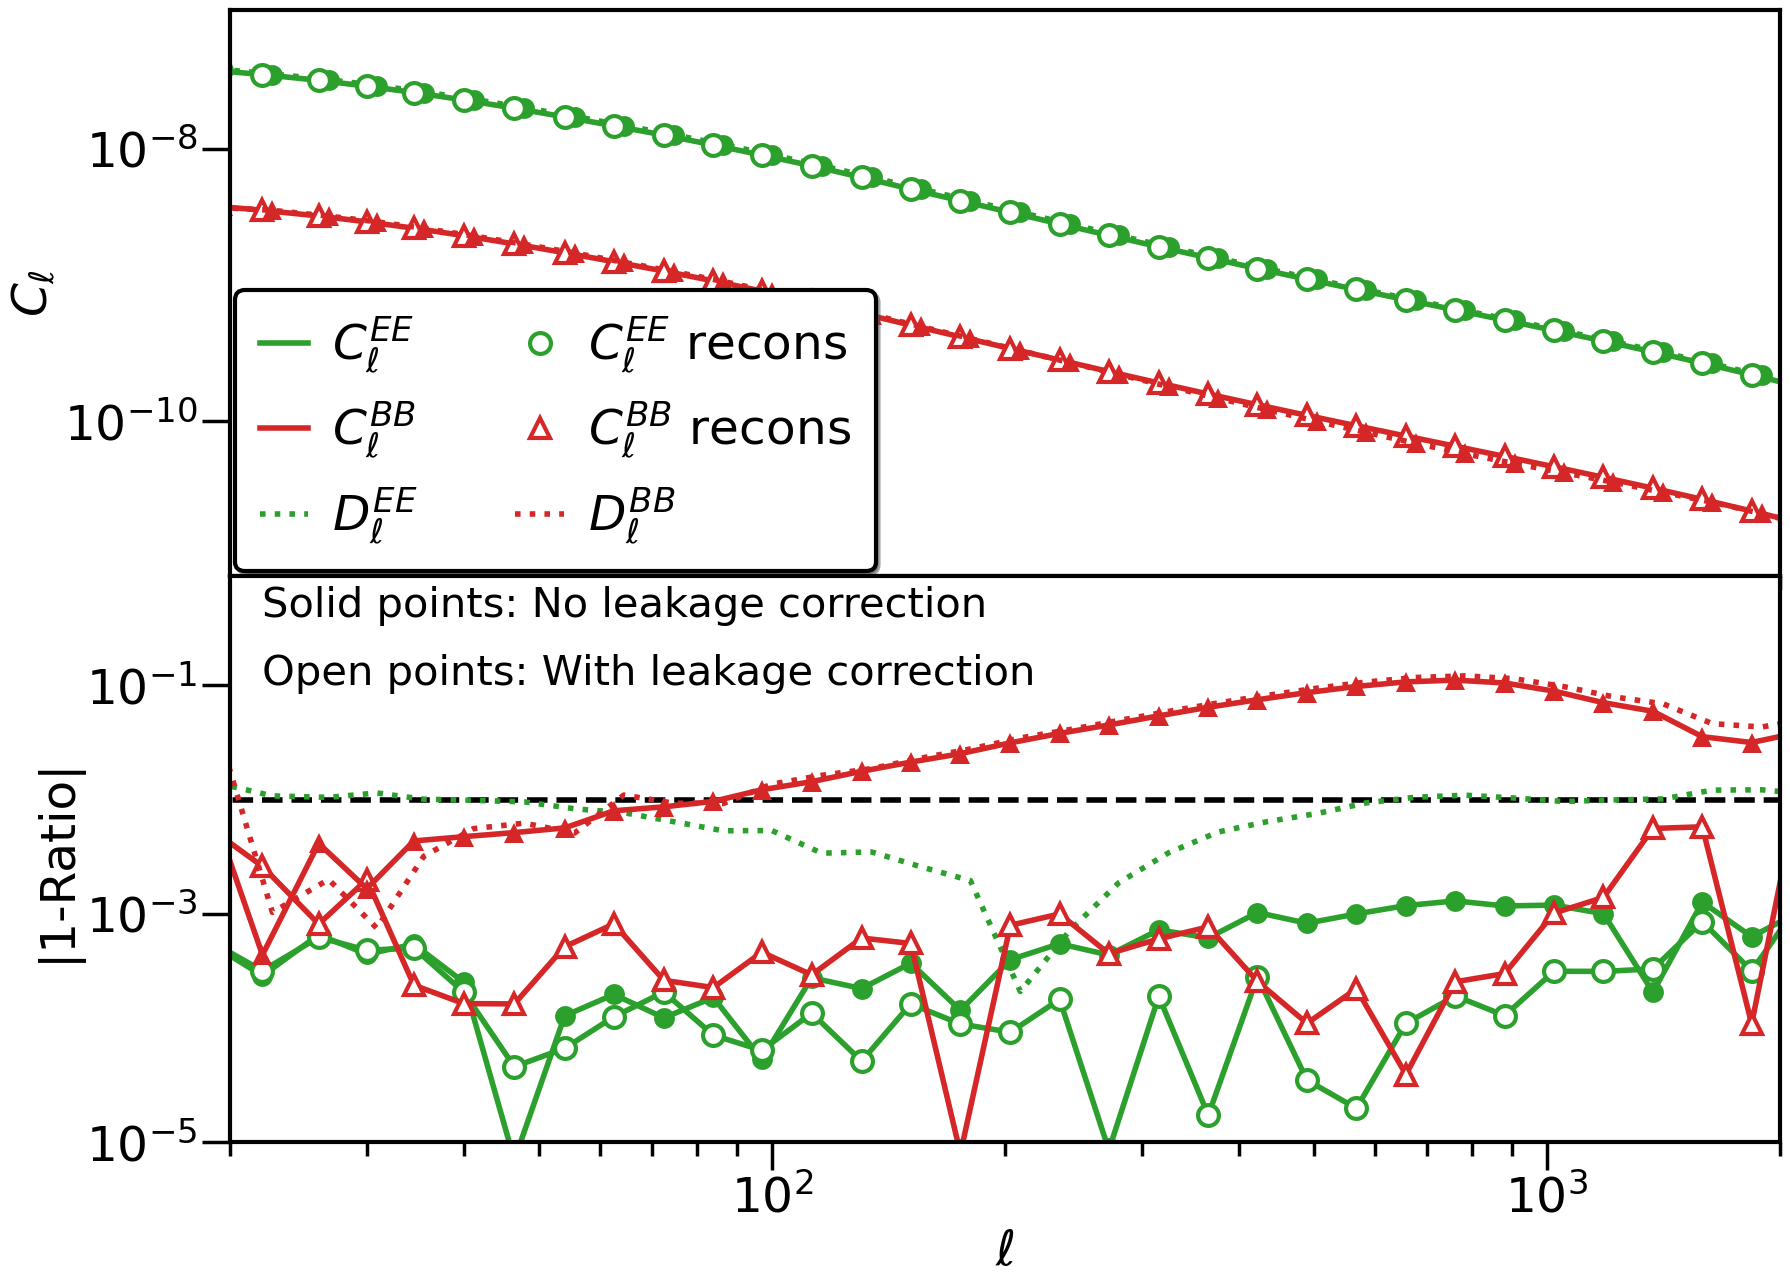

In [183]:
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ps=ax[0]
pR=ax[1]

ps.plot(lb,cl0[corr][bi],'-',label='$C_\ell^{EE}$',c=colors[2])
ps.plot(lb,cl_bb_b,'-',label='$C_\ell^{BB}$',c=colors[3])

ms=15
ps.plot(lb*1.03,pcl['e'],':',c=colors[2],label='$D_\ell^{EE}$')
ps.plot(lb*1.03,cl_xi['E'],'o',c=colors[2],ms=ms)
ps.plot(lb,cl_xi['E2'],'o',mfc='white',mew=3,ms=ms,c=colors[2],label='$C_\ell^{EE}$ recons')
ps.plot(lb,cl_xi['B2'],'^',mfc='white',mew=3,ms=ms,c=colors[3],label='$C_\ell^{BB}$ recons')
ps.plot(lb*1.03,cl_xi['B'],'^',c=colors[3],ms=ms)
ps.plot(lb*1.03,pcl['b'],':',c=colors[3],label='$D_\ell^{BB}$',ms=ms)


# pR.plot(lb*1.03,pcl['e']/cl0[corr][bi],':',c=colors[2],ms=ms)
# pR.plot(lb,cl_xi['E']/cl0[corr][bi],'o',c=colors[2],ms=ms)
# pR.plot(lb,cl_xi['E2']/cl0[corr][bi],'o',mfc='white',mew=3,c=colors[2],ms=ms)
# pR.plot(lb,cl_xi['B2']/cl_bb_b,'^',mfc='white',mew=3,c=colors[3],ms=ms)
# pR.plot(lb,cl_xi['B']/cl_bb_b,'^',c=colors[3],ms=ms)
# pR.plot(lb*1.03,pcl['b']/cl_bb_b,':',c=colors[3],ms=ms)

pR.plot(lb*1.03,np.absolute(1-pcl['e']/cl0[corr][bi]),':',c=colors[2],ms=ms)
pR.plot(lb,np.absolute(1-cl_xi['E']/cl0[corr][bi]),'o-',c=colors[2],ms=ms)
pR.plot(lb,np.absolute(1-cl_xi['E2']/cl0[corr][bi]),'o-',mfc='white',mew=3,c=colors[2],ms=ms)
pR.plot(lb,np.absolute(1-cl_xi['B2']/cl_bb_b),'^-',mfc='white',mew=3,c=colors[3],ms=ms)
pR.plot(lb,np.absolute(1-cl_xi['B']/cl_bb_b),'^-',c=colors[3],ms=ms)
pR.plot(lb*1.03,np.absolute(1-pcl['b']/cl_bb_b),':',c=colors[3],ms=ms)

ps.set_xscale('log')
pR.set_ylim(1.e-5,.9)
pR.hlines(.01,10,2000,color='k',ls='--')
ps.set_yscale('log')
pR.set_yscale('log')
ps.set_xlim(20,2000)
ps.set_ylabel('$C_\ell$')
pR.set_ylabel('|1-Ratio|')
pR.set_xlabel('$\ell$')
pR.text(x=22,y=.4,s='Solid points: No leakage correction',fontsize=30)
pR.text(x=22,y=.1,s='Open points: With leakage correction',fontsize=30)
ps.legend(ncol=2,fontsize=35)
fname='corr_EB.pdf'
fname=fig_home+fname
print(fname)
fig.savefig(fname,bbox_inches='tight',format='pdf')

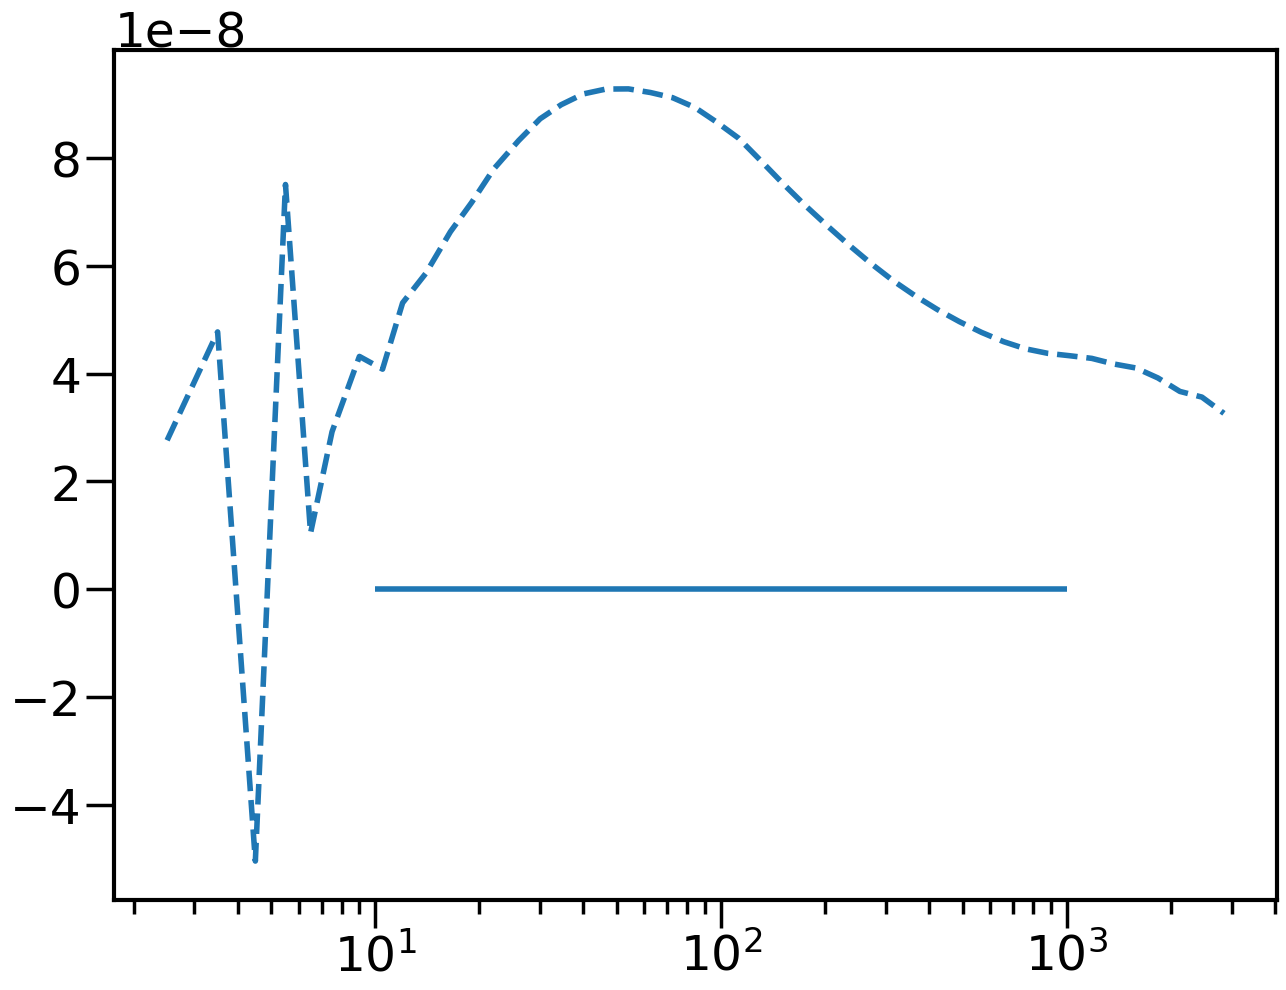

In [177]:
plot(lb,lb*cl_xi['B'],'--')
xscale('log')
hlines(0,10,1000)

In [190]:
%timeit M_xi[(2,2)][50:,:]@xi_cl0_ub[corr][bi]

279 µs ± 6.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
